# Import packages

In [2]:
import os
import json
import matplotlib.pyplot as plt

# Load embeddings

In [3]:
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

def extract_model_nickname(file_name):
    return file_name[6:-5]

def extract_model_name_from_nickname(model_nickname):
    return '_'.join(model_nickname.split('_')[:-1])

In [42]:
basemodel_nickname = 'vgg19_pretrained'
lr_img_emb = 0.75
thr_img_emb = 0.001
k = 5
max_iter_img_emb = 50000

apdx1 = 'topk_s=20-dim=30-lr_emb=0.01-num_emb_epochs=100-num_emb_negs=3'
apdx2 = f'dim=30-lr_img_emb={lr_img_emb}-thr_img_emb={thr_img_emb}-max_iter_img_emb={max_iter_img_emb}-k={k}'
dir_path = f'../../../data/embedding/emb-{basemodel_nickname}-{apdx1}/data/emb-set-{apdx2}/emb_2d'
fig_dir = os.path.join(dir_path, 'fig')
file_names = sorted(os.listdir(dir_path))
file_names = [f for f in file_names if f.endswith('.json')]

In [43]:
emb2d = {}
for file_name in file_names:
    file_path = os.path.join(dir_path, file_name) 
    data = load_json(file_path)
    
    model_nickname = extract_model_nickname(file_name)
    emb2d[model_nickname] = data

In [48]:
model_nicknames = list(emb2d.keys())
model_names = []
for model_nickname in model_nicknames:
    if basemodel_nickname in model_nickname:
        model_name = basemodel_nickname
    else:
        model_name = extract_model_name_from_nickname(model_nickname)
    if model_name not in model_names:
        model_names.append(model_name)

model_names

['convnext_0.004',
 'convnext_0.004_lambda0',
 'convnext_0.02',
 'inception_v3_1.5',
 'vgg16_0.01',
 'vgg16_no_dropout_0.01',
 'vgg19_pretrained']

# Get the range of coordinates

In [45]:
X_range, Y_range = [1000, -1000], [1000, -1000]
for model_nickname in emb2d:
    for neuron in emb2d[model_nickname]:
        x, y = emb2d[model_nickname][neuron]
        X_range[0] = min(X_range[0], x)
        X_range[1] = max(X_range[1], x)
        Y_range[0] = min(Y_range[0], y)
        Y_range[1] = max(Y_range[1], y)
        
X_range[0] -= 0.1
X_range[1] += 0.1
Y_range[0] -= 0.1
Y_range[1] += 0.1

print('X_range:', X_range)
print('Y_range:', Y_range)

X_range: [6.118838691711426, 14.600176429748535]
Y_range: [-2.156966543197632, 6.487360095977783]


# Get 2D embedding visualization

In [46]:
colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
color_map = {
    'vgg19': colors[1],
    'vgg16_0.01': colors[2],
    'vgg16_0.05': colors[7],
    'vgg16_no_dropout_0.01': colors[4],
    'inception_v3_1.5': colors[0],
    'convnext_0.004': colors[3],
    'convnext_0.004_lambda0': colors[5],
    'convnext_0.02': colors[6]
}

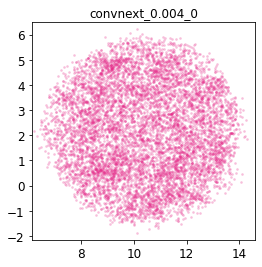

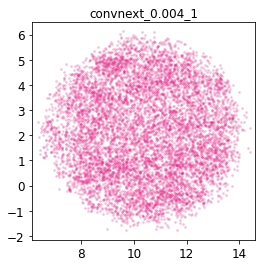

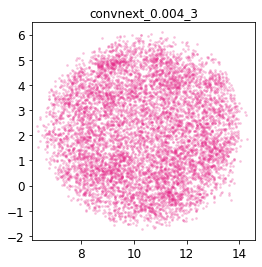

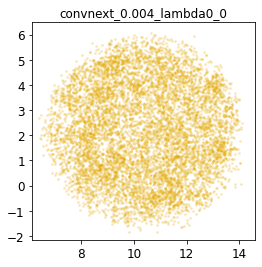

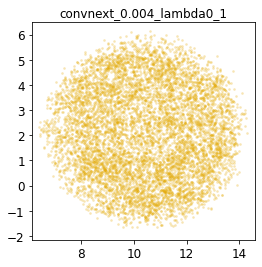

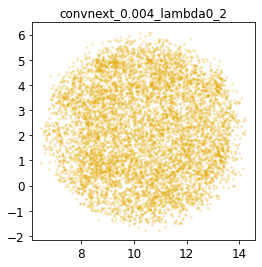

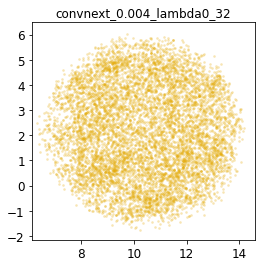

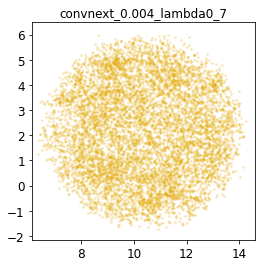

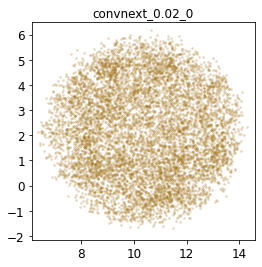

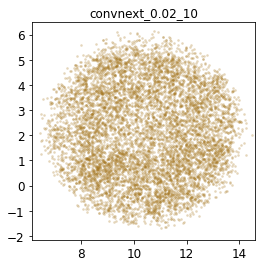

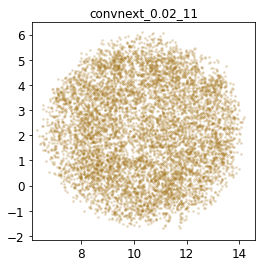

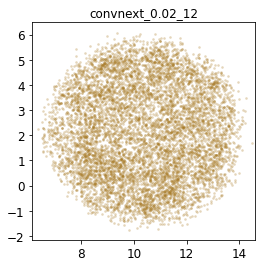

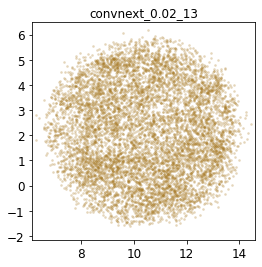

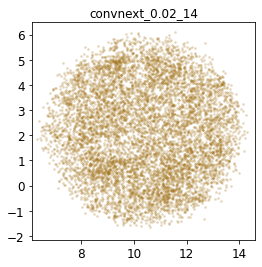

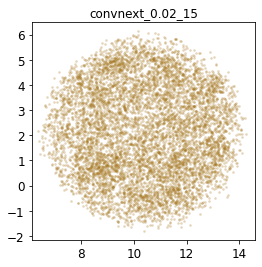

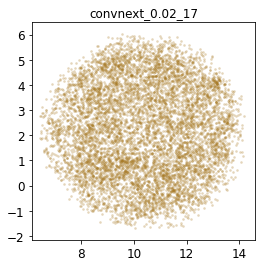

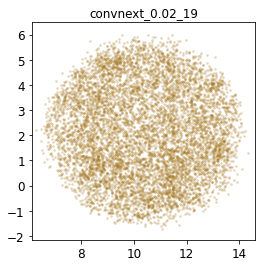

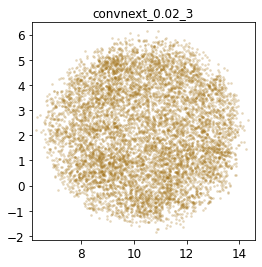

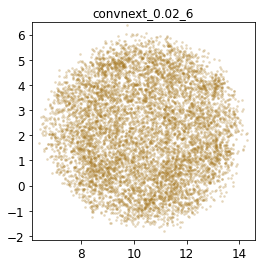

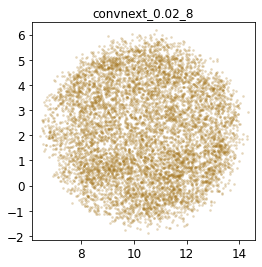

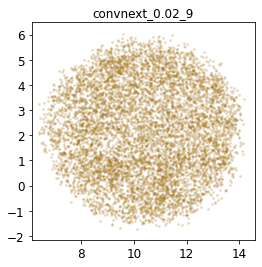

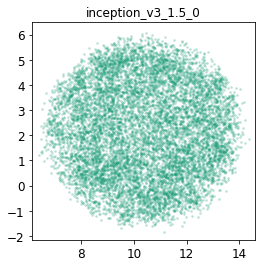

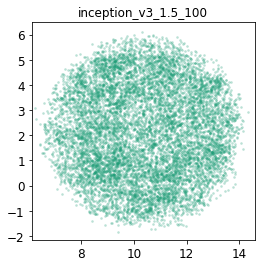

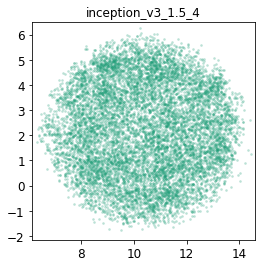

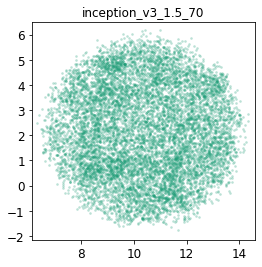

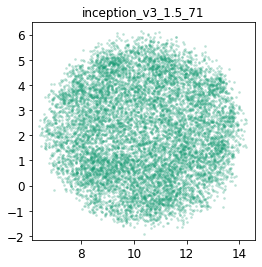

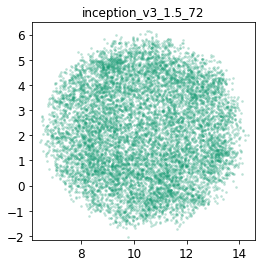

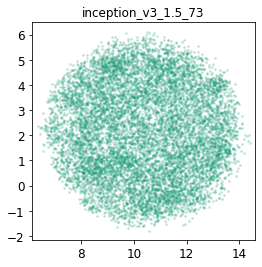

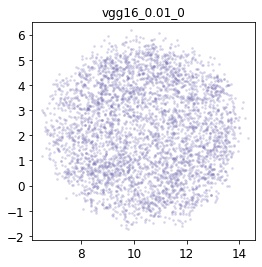

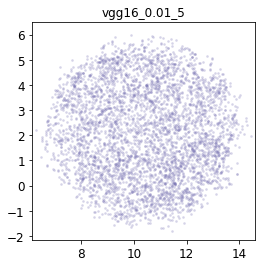

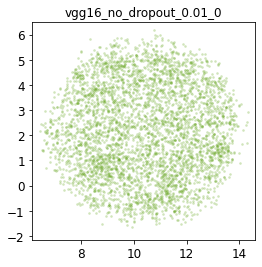

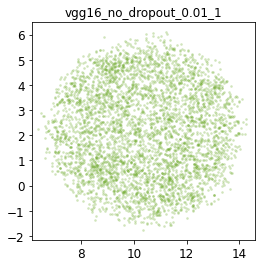

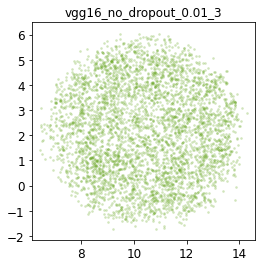

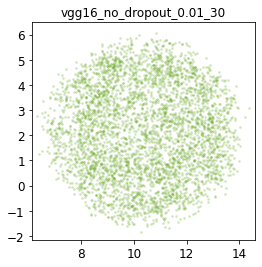

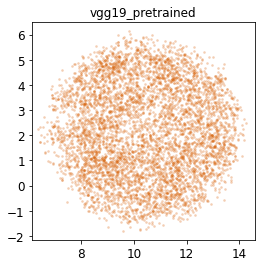

In [51]:
for model_nickname in emb2d:
    Xs = [emb2d[model_nickname][neuron][0] for neuron in emb2d[model_nickname]]
    Ys = [emb2d[model_nickname][neuron][1] for neuron in emb2d[model_nickname]]
    
    model_name = extract_model_name_from_nickname(model_nickname)
    color = color_map[model_name]
    
    plt.figure(figsize=(4, 4))
    plt.scatter(Xs, Ys, s=3, alpha=0.2, c=color)
    plt.xlim(X_range)
    plt.ylim(Y_range)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(model_nickname)
    # plt.savefig(f'{fig_dir}/{model_nickname}.png')
    # plt.savefig(f'{fig_dir}/{model_nickname}.svg')
    plt.show()